<a href="https://colab.research.google.com/github/weathon/Hand/blob/main/Hand_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
import PIL

import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:
!curl -L "https://public.roboflow.com/ds/Cg15nsAHEv?key=7DyBAK5FOA" > roboflow.zip; unzip -n roboflow.zip > /dev/null; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   893  100   893    0     0   1301      0 --:--:-- --:--:-- --:--:--  1299
100  316M  100  316M    0     0  66.3M      0  0:00:04  0:00:04 --:--:-- 98.3M


In [ ]:
train_images = "./train/"
csv_file = "./train/_annotations.csv"

test_images = "./test/"
test_csv_file = "./test/_annotations.csv"

In [ ]:
dataset={}
with open(csv_file,"r") as f:
  lines = f.read().split("\n")
  for i in lines[1:]:
    if i == "":
      continue
    file_name, _, __, ___, x, y, h, w = i.split(",")
    x,y,h,w=int(x),int(y),int(h),int(w)
    try:
      dataset[train_images + file_name].append([x,y,h,w])
    except:
      dataset[train_images + file_name]=[[x,y,h,w]]

In [ ]:
test_dataset={}
with open(test_csv_file,"r") as f:
  lines = f.read().split("\n")
  for i in lines[1:]:
    if i == "":
      continue
    file_name, _, __, ___, x, y, h, w = i.split(",")
    x,y,h,w=int(x),int(y),int(h),int(w)
    try:
      test_dataset[test_images + file_name].append([x,y,h,w])
    except:
      test_dataset[test_images + file_name]=[[x,y,h,w]]

In [ ]:
train = []
for i in dataset.keys():
  uri = i

  mar = np.zeros(shape=(10,10)) # Changed test set not here. wangle zui hou yi wie shi you mei you.  guai bu de. fashengjing le kun huang kou ke zhe ge quanhzongshiduoshao? kunyunhuang 
  for j in dataset[i]:
    x,y,h,w = j[0],j[1],j[2],j[3]
    mid_x = (x+h)/2
    mid_y = (y+w)/2

    girdX = int(mid_x // (1280/10))
    girdY = int(mid_y // (720/10))

    relative_h = h/(1280/20)
    relative_w = w/(720/20)

    relative_x = -(mid_x - x)/(1280/10)
    relative_y = -(mid_y - y)/(720/10)
    mar[girdY,girdX] = 1
  train.append((uri,mar))
# otuotngkoukekunhuang beixuanfangan: wanquantianchong

In [ ]:
test = []
for i in test_dataset.keys():
  uri = i

  mar = np.zeros(shape=(10,10)) # Changed test set not here. wangle zui hou yi wie shi you mei you.  guai bu de. fashengjing le kun huang kou ke zhe ge quanhzongshiduoshao? kunyunhuang 
  for j in test_dataset[i]:
    x,y,h,w = j[0],j[1],j[2],j[3]
    mid_x = (x+h)/2
    mid_y = (y+w)/2

    girdX = int(mid_x // (1280/10))
    girdY = int(mid_y // (720/10))

    relative_h = h/(1280/20)
    relative_w = w/(720/20)

    relative_x = -(mid_x - x)/(1280/10)
    relative_y = -(mid_y - y)/(720/10)
    mar[girdY,girdX] = 1
  test.append((uri,mar))
# otuotngkoukekunhuang beixuanfangan: wanquantianchong

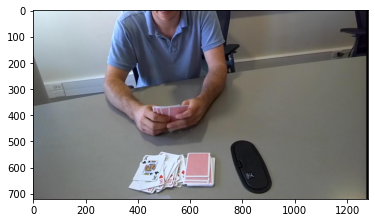

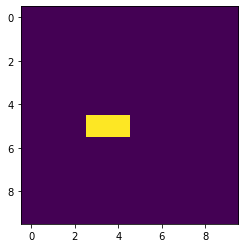

100


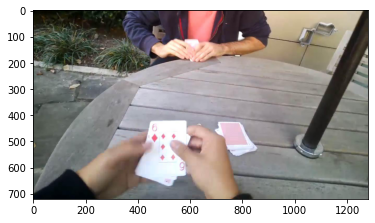

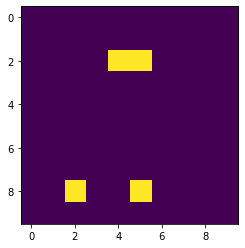

100


In [ ]:
for i in range(2):
  im = PIL.Image.open(test[i][0])
  fig, ax = plt.subplots()
  ax.imshow(im)
  plt.show()

  im = test[i][1]
  fig, ax = plt.subplots()
  ax.imshow(im)
  plt.show()
  print(im.size)

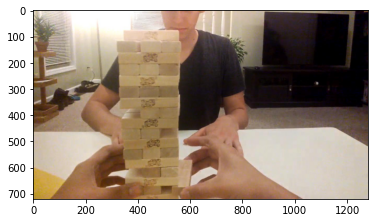

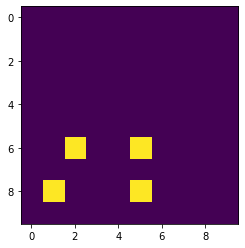

100


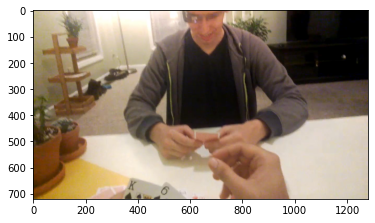

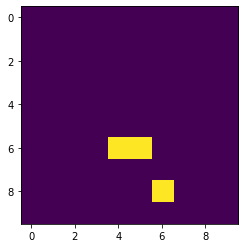

100


In [ ]:
for i in range(2):
  im = PIL.Image.open(train[i][0])
  fig, ax = plt.subplots()
  ax.imshow(im)
  plt.show()

  im = train[i][1]
  fig, ax = plt.subplots()
  ax.imshow(im)
  plt.show()
  print(im.size)

In [ ]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self,
                 batch_size):

        self.batch_size = batch_size

    
    def on_epoch_end(self):
      np.random.shuffle(train)
    
    def __getitem__(self, index):
      x=[]
      y=[]
      # print("Get Item")
      myindex = index * self.batch_size
      for i in range(self.batch_size):
          path = train[i+myindex][0]
          im = PIL.Image.open(path)   
          x.append(np.array(im))

          y.append( train[i+myindex][1])
        # print(x.shape)
        # print("gened")
      x = np.array(x)
      y = np.array(y)
      return x,y
    
    def __len__(self):
        return len(train) // self.batch_size 
# https://medium.com/analytics-vidhya/write-your-own-custom-data-generator-for-tensorflow-keras-1252b64e41c3

traingen = CustomDataGen(16)

class TestCustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self,
                 batch_size):

        self.batch_size = batch_size

    
    def on_epoch_end(self):
      np.random.shuffle(test)
    
    def __getitem__(self, index):
      x=[]
      y=[]
      # print("Get Item")
      myindex = index * self.batch_size
      for i in range(self.batch_size):
          path = test[i+myindex][0]
          im = PIL.Image.open(path)   
          x.append(np.array(im))

          y.append( test[i+myindex][1])
        # print(x.shape)
        # print("gened")
      x = np.array(x)
      y = np.array(y)
      return x,y
    
    def __len__(self):
        return len(test) // self.batch_size
# https://medium.com/analytics-vidhya/write-your-own-custom-data-generator-for-tensorflow-keras-1252b64e41c3

testgen = TestCustomDataGen(16)

In [ ]:
train[0]

('./train/JENGA_LIVINGROOM_T_S_frame_0338_jpg.rf.a7f5b2ec6291aaa76cf6adff77c3dc49.jpg',
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.]]))

In [ ]:
image_w , image_h = 1280,720 


model = tf.keras.models.Sequential([
  # Gray Scale Image
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(image_h,image_w,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(1024, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(1024, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(2048, (3,3), activation='relu'), 
  # tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.8), 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='linear'),
  tf.keras.layers.Dense(512, activation='sigmoid'),
  tf.keras.layers.Dense(100, activation='sigmoid
  '),
  tf.keras.layers.Reshape(target_shape=(10,10))
    # tf.keras.layers.Dense(5, activation='softmax')
])
# (None, 38, 20, 4) 
model.summary()
print(model.output_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(),
          loss='mean_squared_error',)
model.fit( traingen, validation_data=testgen,epochs=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 718, 1278, 64)     1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 359, 639, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 357, 637, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 178, 318, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 176, 316, 256)     295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 88, 158, 256)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 86, 156, 256)      5

In [ ]:
ts = train[5][0]

im = PIL.Image.open(ts)
# ans = model.predict(x[0])
print(model.input_shape)
input_image = np.array([np.array(np.random.rand((720,1280,3)))])#toutongkouke qun 0 youbuyyyangle danshi xingzhuanglei si 
print(input_image.shape)
ans = model.predict(input_image)
print(ans)
print(np.argmax(ans))

im = PIL.Image.open(ts)
location = np.unravel_index(np.argmax(ans), ans.shape)
fig, ax = plt.subplots()
ax.imshow(im)
plt.show()
print(im.size)

(None, 720, 1280, 3)


TypeError: ignored

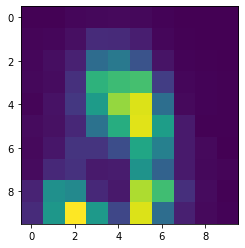

In [ ]:
fig, ax = plt.subplots()
ax.imshow(ans[0])
plt.show()
# Always Same Result